# Networks

- Notebook to exercise statistics distributions relevant for Turtles

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Thu May 14 10:57:49 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import expon

In [4]:
from networkx import *

In [5]:
import networkx as nx

In [6]:
from turtleWorld.utils import PrtLvl, print_level, throw_dice


In [7]:
from turtleWorld.networks import KE_newtwork_step, KE_network_init,KE_network, select_random_node
from turtleWorld.networks import active_nodes, node_is_active, node_color, degree_list

In [8]:
%load_ext line_profiler

# Erdos-Renyi graph 

- The classic Erdos-Renyi network: Each of the possible N(N − 1)/2 links among the N edges is activated randomly with probability p. This is well understood mathematically. They are not scale free networks (the degree distribution is Poisson). They are small-world networks. They show a very small clustering coefficient.

In [32]:
er = nx.erdos_renyi_graph(40000,0.001)

In [37]:
Der = np.array([degree(er,n) for n in nodes(er)])
Cer= np.array([clustering(er,n) for n in nodes(er)])

In [38]:
np.mean(Der)

39.9796

(array([  44.,  500., 2428., 4007., 6285., 4431., 1547.,  637.,  111.,
          10.]),
 array([19. , 23.7, 28.4, 33.1, 37.8, 42.5, 47.2, 51.9, 56.6, 61.3, 66. ]),
 <a list of 10 Patch objects>)

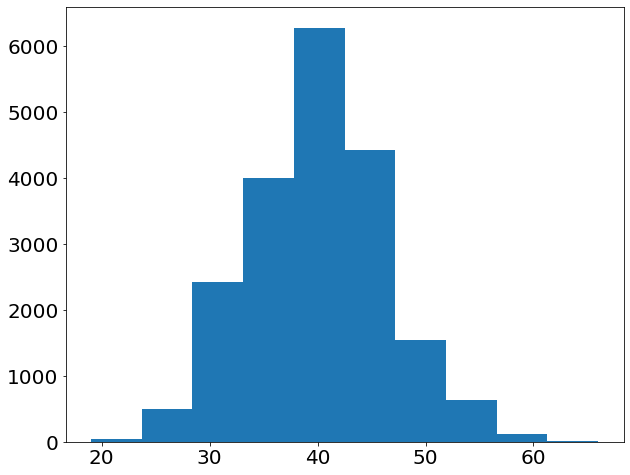

In [14]:
plt.hist(D)

(array([9.348e+03, 6.615e+03, 2.831e+03, 9.310e+02, 2.000e+02, 6.100e+01,
        6.000e+00, 7.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00160428, 0.00320856, 0.00481283, 0.00641711,
        0.00802139, 0.00962567, 0.01122995, 0.01283422, 0.0144385 ,
        0.01604278]),
 <a list of 10 Patch objects>)

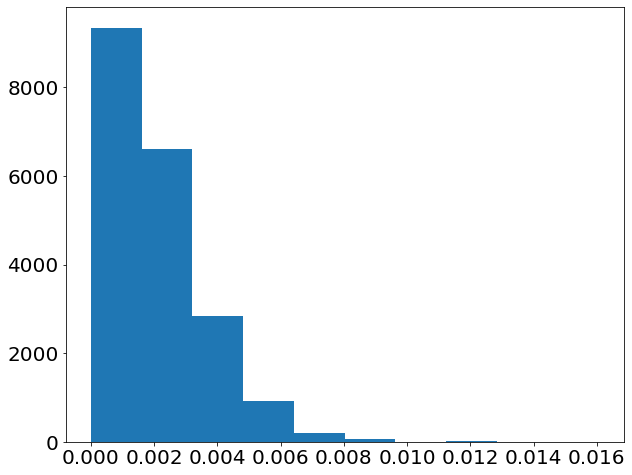

In [15]:
plt.hist(C)

(array([41.,  4.,  3.,  3.,  2.,  1.,  3.,  2.,  3.,  5.]),
 array([   0. ,  131.2,  262.4,  393.6,  524.8,  656. ,  787.2,  918.4,
        1049.6, 1180.8, 1312. ]),
 <a list of 10 Patch objects>)

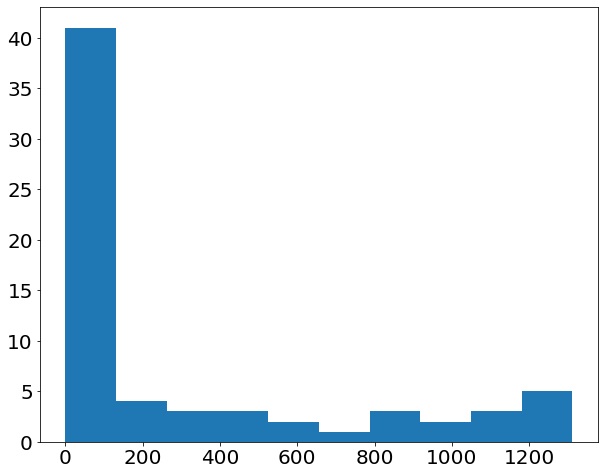

In [16]:
plt.hist(degree_histogram(er))

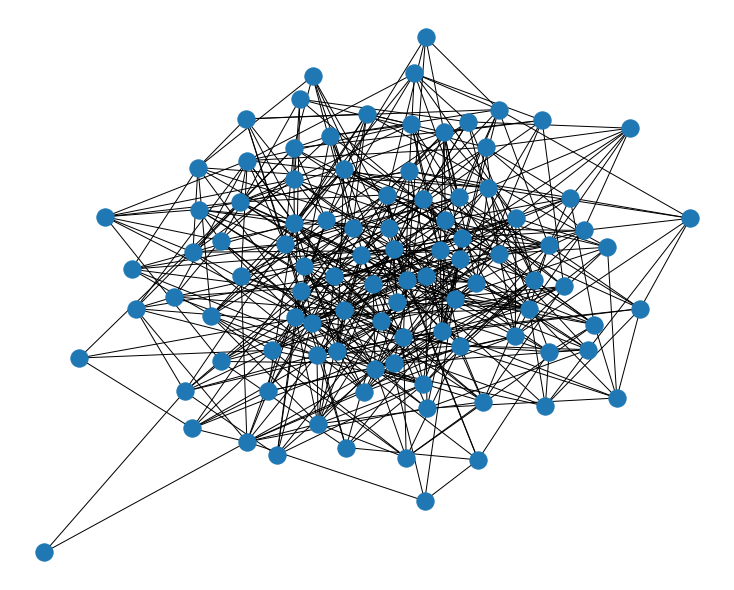

In [14]:
nx.draw(er)

In [15]:
def degree_and_clustering(g):
    D = np.array([degree(g,n) for n in nodes(g)])
    C= np.array([clustering(g,n) for n in nodes(g)])
    return D, C

In [27]:
%lprun er = nx.erdos_renyi_graph(2000,0.002)

Timer unit: 1e-06 s

In [17]:
deg, clus = degree_and_clustering(er)

In [18]:
print(f'ER network: degreee = {np.mean(deg)}, clusterings = {np.mean(clus)}')

ER network: degreee = 40.0526, clusterings = 0.0019975144072354543


# The Watts-Strogatz model 

- shows that the small world property can be present in graphs with high clustering coefficient (https://www.nature.com/articles/30918). Still the degree distribution is not power law in these models.

In [29]:
%lprun ws=nx.watts_strogatz_graph(30,10,0.1)


Timer unit: 1e-06 s

(array([9., 0., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

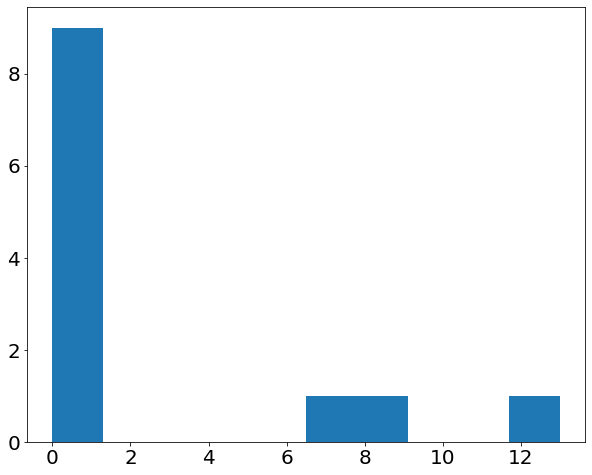

In [20]:
plt.hist(degree_histogram(ws))

(array([ 1.,  0.,  0.,  7.,  0.,  0., 13.,  0.,  0.,  9.]),
 array([ 8. ,  8.3,  8.6,  8.9,  9.2,  9.5,  9.8, 10.1, 10.4, 10.7, 11. ]),
 <a list of 10 Patch objects>)

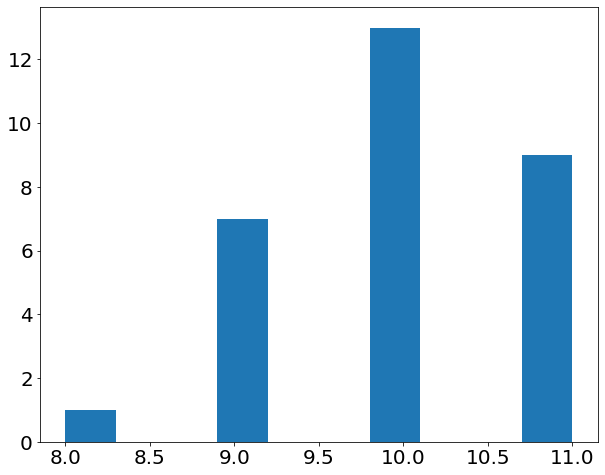

In [21]:
plt.hist(D)

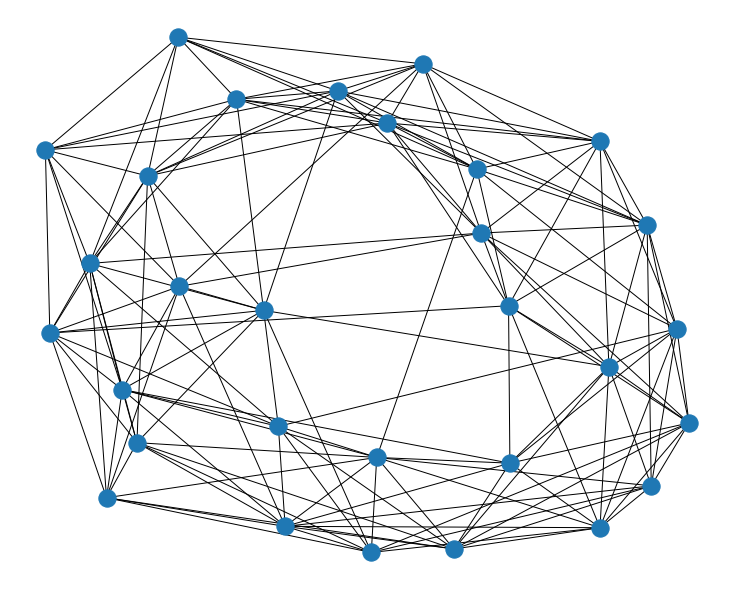

In [22]:
nx.draw(ws)

# TheBarabasi-Albertwork(https://arxiv.org/abs/cond-mat/9910332)

- showed that preferential attachment and growth are some elements that can produce scale-free networks. This model has the small worls property, but is still a random network with very small clustering.


In [17]:
ba=nx.barabasi_albert_graph(20000,20)

In [21]:
D = np.array([degree(ba,n) for n in nodes(ba)])
C= np.array([clustering(ba,n) for n in nodes(ba)])

In [22]:
np.mean(D)

39.96

(array([7.169e+03, 9.516e+03, 1.815e+03, 6.220e+02, 3.260e+02, 1.430e+02,
        1.040e+02, 5.100e+01, 6.500e+01, 3.600e+01, 2.800e+01, 2.100e+01,
        1.500e+01, 8.000e+00, 4.000e+00, 8.000e+00, 4.000e+00, 8.000e+00,
        1.300e+01, 7.000e+00]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.,
        275., 300., 325., 350., 375., 400., 425., 450., 475., 500.]),
 <a list of 20 Patch objects>)

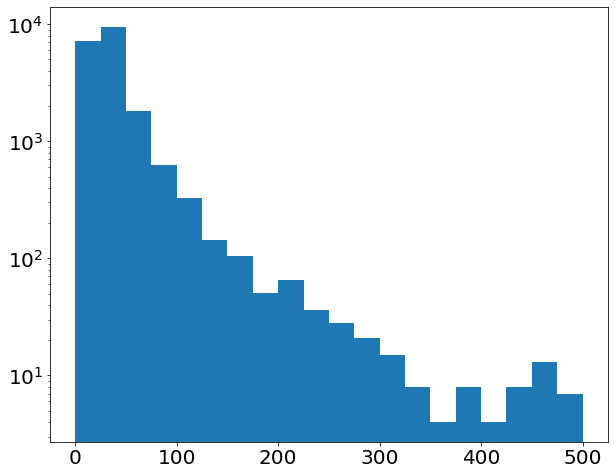

In [31]:
plt.hist(D, bins=20, log=True, range=(0,500))

(array([0.000e+00, 2.000e+00, 7.980e+02, 8.740e+03, 9.092e+03, 1.330e+03,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]),
 <a list of 20 Patch objects>)

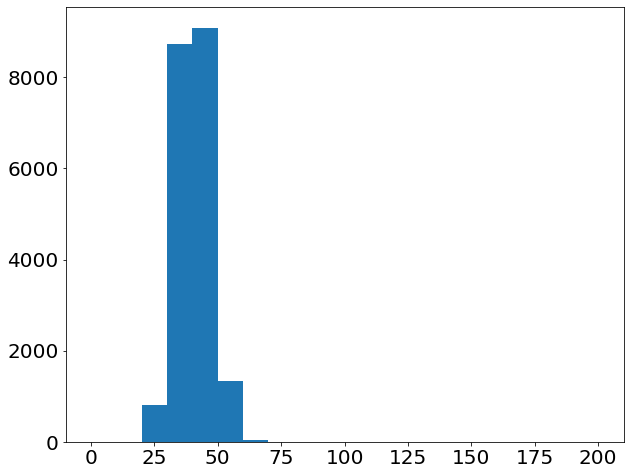

In [29]:
plt.hist(Der, bins=20,range=(0,200))

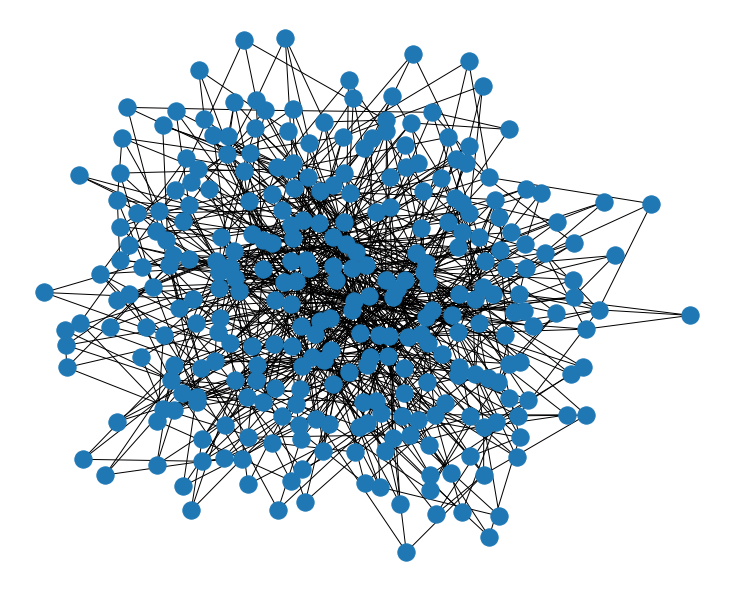

In [15]:
nx.draw(ba)

In [17]:
degree_list(ba)

array([24, 21,  5, 44, 38, 31, 20, 17, 14, 19, 39, 11, 43, 17, 22, 12,  7,
        9, 14,  7, 15, 16,  9,  7, 14,  4,  9, 12,  8,  3,  4, 12, 12, 11,
        7, 10, 11, 16,  5, 20,  6,  5,  9, 13,  3,  5,  7,  4,  4, 13,  7,
        8,  8,  9, 15,  8,  4,  3,  6,  6, 16,  9,  9,  3,  8,  4,  9, 10,
        9,  3,  7,  5,  5,  3,  3,  8,  8,  4,  5,  6,  7,  7,  8,  5,  6,
        5,  6,  6,  3, 11, 10,  3,  6,  6,  9, 10,  3,  4,  8,  6,  4,  5,
        4,  5,  3,  3,  4,  5,  4,  4,  3,  6,  3,  5,  7,  4,  3,  3,  4,
        3,  3,  6,  6,  3,  4,  3,  6,  5, 10,  4,  5,  3,  4,  4,  3,  3,
        5,  6,  3,  5,  4,  3,  9,  3,  3,  5,  6,  6,  5,  4,  6,  4,  6,
        5,  3,  4,  4,  4,  3,  3,  3,  4,  3,  4,  6,  4,  3,  3,  4,  3,
        3,  6,  5,  3,  3,  4,  3,  4,  4,  3,  3,  5,  5,  4,  5,  3,  3,
        4,  5,  4,  5,  4,  5,  3,  5,  3,  3,  6,  3,  5,  4,  5,  4,  3,
        5,  3,  3,  3,  3,  6,  3,  4,  5,  5,  3,  4,  3,  3,  4,  3,  3,
        3,  3,  4,  3,  3

In [19]:
np.mean(degree_list(ba))

5.94

In [20]:
ba=nx.barabasi_albert_graph(20000,20)

In [21]:
np.mean(degree_list(ba))

39.96

(array([1.01e+03, 1.00e+01, 4.00e+00, 3.00e+00, 2.00e+00, 1.00e+00,
        2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00]),
 array([   0. ,  180.2,  360.4,  540.6,  720.8,  901. , 1081.2, 1261.4,
        1441.6, 1621.8, 1802. ]),
 <a list of 10 Patch objects>)

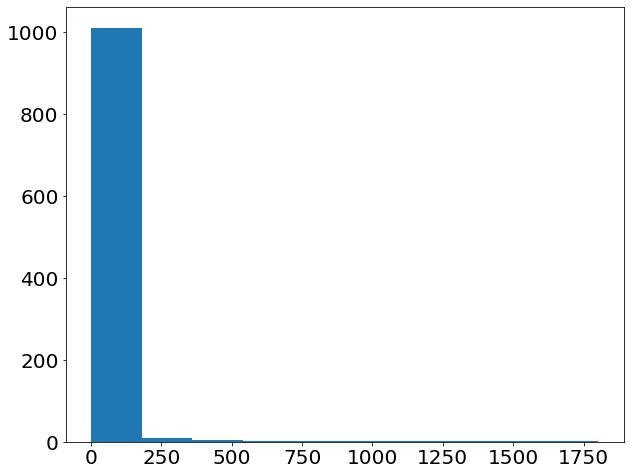

In [22]:
plt.hist(degree_histogram(ba))

(array([237.,  31.,   4.,  20.,   1.,   0.,   6.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

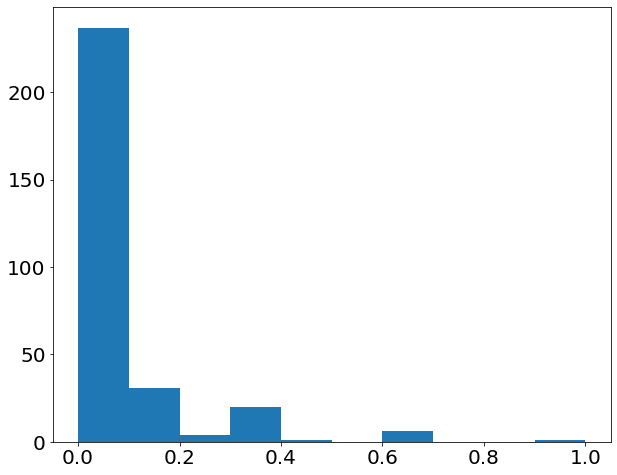

In [25]:
plt.hist(C)

(array([258.,  18.,  14.,   5.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([ 3. ,  8.4, 13.8, 19.2, 24.6, 30. , 35.4, 40.8, 46.2, 51.6, 57. ]),
 <a list of 10 Patch objects>)

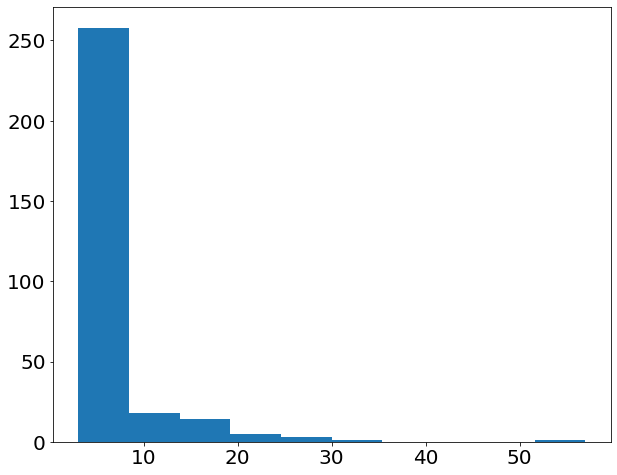

In [26]:
plt.hist(D)

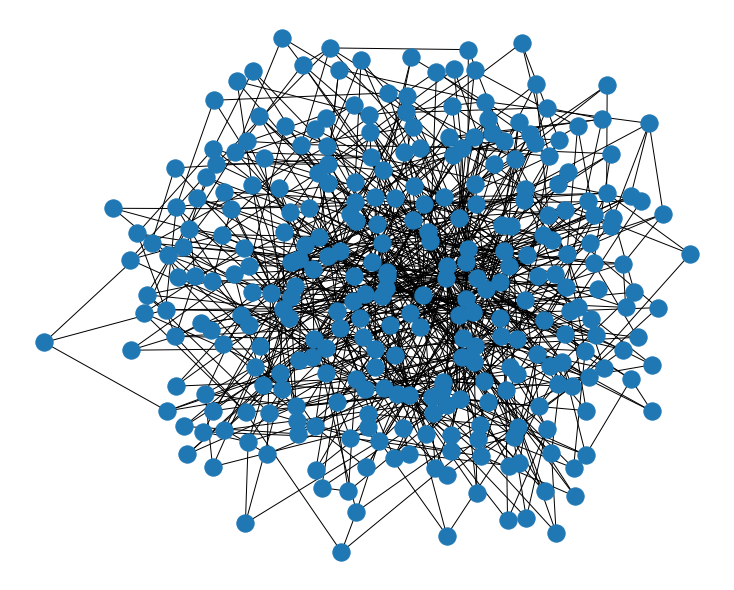

In [27]:
nx.draw(ba)

# KE (Klemm Eguilez) Network
- Nodes are assigned a binary state (1 = active, 0 = inactive)
- Start with a completetely connected network of m active nodes.

- 1. A new node joins the network in the following way:
    - i.   For each of the m links of the new node it is decided randomly if the link connects to the active node or to a random node
    - ii.  The probability to attach to a random node is specified by the parameter $\mu$.
    - iii. If a random node is chosen, the criterium is linear preference attachment, that is the probability that node $j$ grabs a link is proportional to the node's degree $k_j$. 
- 2. The new node becomes active.
- 3. One of the actives node is deactivated according to the following criterium:
    - i. The probability that node $i$ is chosen for deactivation is $p_i = \frac{a}{k_i}$ with normalisation $ a = \sum_j \frac{1}{k_j}$

In [55]:
mu = 0.5

### Start with a complete graph

In [69]:
G = KE_network_init(m=10)
print(f' new set of nodes after return = {G.nodes.data()}')

 new set of nodes after return = [(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 1}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1})]


In [70]:
active_nodes(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [71]:
pos = nx.spring_layout(G, k=0.3)

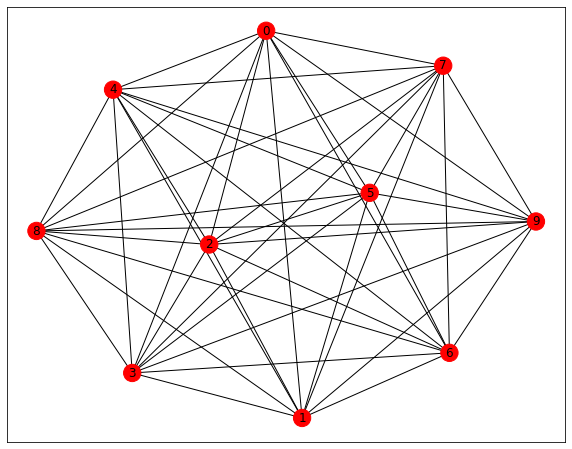

In [72]:
nx.draw_networkx(G, pos, node_color=node_color(G))

In [73]:
KE_newtwork_step(G, mu)

 Now considering link from node = 10 to node = 0
 Now choosing active node = 0
 Now considering link from node = 10 to node = 1
[8 0 2 6 4 3 5 7 1 9]
 node  = 8 pa = 0.1, degree = 9, norm = 90
 node  = 0 already selected
 node  = 2 pa = 0.1, degree = 9, norm = 90
 node  = 6 pa = 0.1, degree = 9, norm = 90
 node  = 4 pa = 0.1, degree = 9, norm = 90
 node  = 3 pa = 0.1, degree = 9, norm = 90
 node  = 5 pa = 0.1, degree = 9, norm = 90
 node  = 7 pa = 0.1, degree = 9, norm = 90
 node  = 1 pa = 0.1, degree = 9, norm = 90
 node  = 9 pa = 0.1, degree = 9, norm = 90
 selected node = 9, WG = [0]
 Attach random node = 9
 Now considering link from node = 10 to node = 2
 Now choosing active node = 2
 Now considering link from node = 10 to node = 3
[5 7 8 2 1 4 3 9 0 6]
 node  = 5 pa = 0.1, degree = 9, norm = 90
 node  = 7 pa = 0.1, degree = 9, norm = 90
 node  = 8 pa = 0.1, degree = 9, norm = 90
 selecting random node = 8 with prob = 0.1
 selected node = 8, WG = [0, 9, 2]
 Attach random node = 8
 

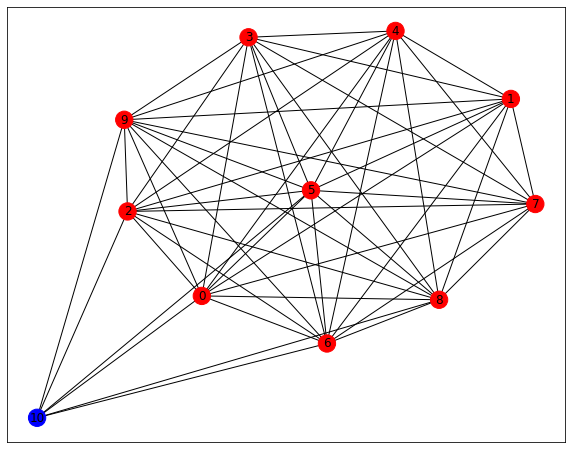

In [74]:
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, node_color=node_color(G))

In [75]:
degree_list(G)

array([10,  9, 10,  9,  9, 10, 10,  9, 10, 10,  6])

In [76]:
KE_newtwork_step(G, mu)

 Now considering link from node = 11 to node = 0
[ 1 10  6  9  8  5  2  0  3  4  7]
 node  = 1 pa = 0.08823529411764706, degree = 9, norm = 102
 node  = 10 pa = 0.058823529411764705, degree = 6, norm = 102
 node  = 6 pa = 0.09803921568627451, degree = 10, norm = 102
 node  = 9 pa = 0.09803921568627451, degree = 10, norm = 102
 node  = 8 pa = 0.09803921568627451, degree = 10, norm = 102
 node  = 5 pa = 0.09803921568627451, degree = 10, norm = 102
 node  = 2 pa = 0.09803921568627451, degree = 10, norm = 102
 selecting random node = 2 with prob = 0.09803921568627451
 selected node = 2, WG = []
 Attach random node = 2
 Now considering link from node = 11 to node = 1
[ 9  4  2  7  1  0  5  3  8 10  6]
 node  = 9 pa = 0.09803921568627451, degree = 10, norm = 102
 node  = 4 pa = 0.08823529411764706, degree = 9, norm = 102
 node  = 2 already selected
 node  = 7 pa = 0.08823529411764706, degree = 9, norm = 102
 node  = 1 pa = 0.08823529411764706, degree = 9, norm = 102
 selecting random node = 

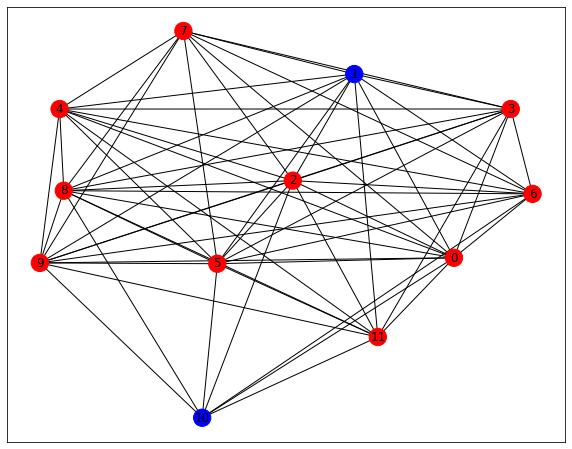

In [77]:
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, node_color=node_color(G))

In [78]:
degree_list(G)

array([11, 10, 11, 10, 10, 11, 10,  9, 11, 11,  7,  9])

In [79]:
KE_newtwork_step(G, mu)

 Now considering link from node = 12 to node = 0
 Now choosing active node = 0
 Now considering link from node = 12 to node = 1
[ 1  8  7  4  6 10  3  0  5  2  9 11]
 node  = 1 pa = 0.08333333333333333, degree = 10, norm = 120
 node  = 8 pa = 0.09166666666666666, degree = 11, norm = 120
 node  = 7 pa = 0.075, degree = 9, norm = 120
 node  = 4 pa = 0.08333333333333333, degree = 10, norm = 120
 node  = 6 pa = 0.08333333333333333, degree = 10, norm = 120
 node  = 10 pa = 0.058333333333333334, degree = 7, norm = 120
 node  = 3 pa = 0.08333333333333333, degree = 10, norm = 120
 node  = 0 already selected
 node  = 5 pa = 0.09166666666666666, degree = 11, norm = 120
 node  = 2 pa = 0.09166666666666666, degree = 11, norm = 120
 selecting random node = 2 with prob = 0.09166666666666666
 selected node = 2, WG = [0]
 Attach random node = 2
 Now considering link from node = 12 to node = 2
 node already selected 
 Now considering link from node = 12 to node = 3
[ 5  1 11  4  6  0  3  2  8 10  9  7]

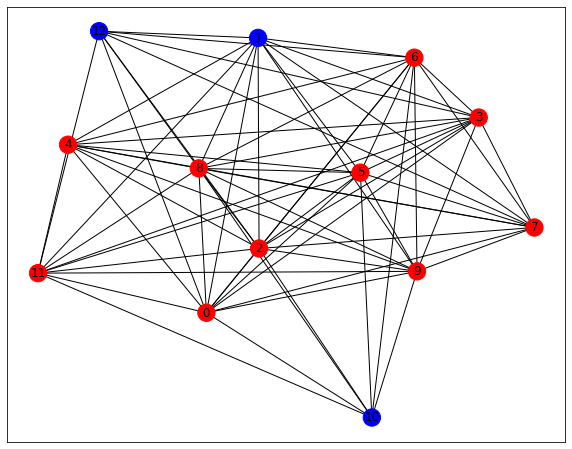

In [80]:
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, node_color=node_color(G))

In [81]:
degree_list(G)

array([12, 11, 12, 11, 10, 11, 11, 10, 12, 11,  7, 10,  8])

In [84]:
KE_newtwork_step(G, mu)

In [85]:
def mns(G, mu):
    return KE_newtwork_step(G, mu)

In [86]:
%lprun -f select_random_node mns(G, mu)

Timer unit: 1e-06 s

Total time: 0.000827 s
File: /Users/jjgomezcadenas/Projects/Development/turtleWorld/turtleWorld/networks.py
Function: select_random_node at line 132

Line #      Hits         Time  Per Hit   % Time  Line Contents
   132                                           def select_random_node(G, WG, norm0):
   133                                           
   134         6          7.0      1.2      0.8      def pa_norm(g, WG):
   135                                                   norm = 0
   136                                                   for n in WG:
   137                                                       norm += degree(G, n)
   138                                                   return norm
   139                                           
   140         6        190.0     31.7     23.0      rnodes = node_list_rnd_ki_kj(G, 0, -1)
   141                                               #print(rnodes)
   142        53         46.0      0.9      5.6      for n 

In [87]:
mu=0.5
%lprun -f KE_newtwork_step mns(G, mu)

Timer unit: 1e-06 s

Total time: 0.002098 s
File: /Users/jjgomezcadenas/Projects/Development/turtleWorld/turtleWorld/networks.py
Function: KE_newtwork_step at line 159

Line #      Hits         Time  Per Hit   % Time  Line Contents
   159                                           def KE_newtwork_step(G, mu):
   160                                               """
   161                                               Steps the KE network
   162                                           
   163                                               - 1. A new node joins the network in the following way:
   164                                                   - i.   For each of the m links of the new node it is decided randomly if the link
   165                                                          connects to the active node or to a random node
   166                                                   - ii.  The probability to attach to a random node is specified by the parameter $\mu$.
   16

In [119]:
KE_newtwork_step(G, mu)

 Now considering link from node = 13 to node = 0
 node  = 0 pa = 0.08695652173913043
 node  = 1 pa = 0.07971014492753623
 node  = 2 pa = 0.07971014492753623
 node  = 3 pa = 0.07246376811594203
 node  = 4 pa = 0.07971014492753623
 node  = 5 pa = 0.07246376811594203
 node  = 6 pa = 0.08695652173913043
 selecting random node = 6 with prob = 0.08695652173913043
 Attach random node = 6
 Now considering link from node = 13 to node = 1
 Now choosing active node = 1
 Now considering link from node = 13 to node = 2
 Now choosing active node = 2
 Now considering link from node = 13 to node = 3
 Now choosing active node = 3
 Now considering link from node = 13 to node = 4
 node  = 0 pa = 0.1276595744680851
 selecting random node = 0 with prob = 0.1276595744680851
 Attach random node = 0
 Now considering link from node = 13 to node = 5
 node  = 0 already selected
 node  = 1 already selected
 node  = 2 already selected
 node  = 3 already selected
 node  = 4 pa = 0.13414634146341464
 node  = 5 pa = 

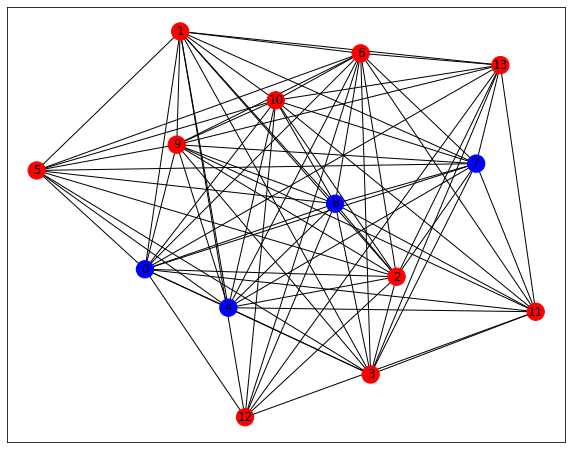

In [120]:
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, node_color=node_color(G))

In [121]:
degree_list(G)

array([13, 12, 12, 11, 11, 10, 13, 12, 12, 12, 12, 10,  8, 10])

In [11]:
%lprun -f KE_network KE_network(N=25, m=5, mu=0.5)

Timer unit: 1e-06 s

Total time: 0.093997 s
File: /Users/jjgomezcadenas/Projects/Development/turtleWorld/turtleWorld/networks.py
Function: KE_network at line 233

Line #      Hits         Time  Per Hit   % Time  Line Contents
   233                                           def KE_network(N, m=10, mu=0.5):
   234                                               """
   235                                               The KE network is build up to N nodes starting from
   236                                               m fully connected nodes.
   237                                           
   238                                               """
   239                                           
   240         1        418.0    418.0      0.4      G = KE_network_init(m)
   241                                           
   242        21         71.0      3.4      0.1      for step in np.arange(N-m):
   243        20      93507.0   4675.4     99.5          KE_newtwork_step(G, mu)
   244 

In [90]:
%timeit ke =  KE_network(N=25, m=5, mu=0.5)

8.44 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


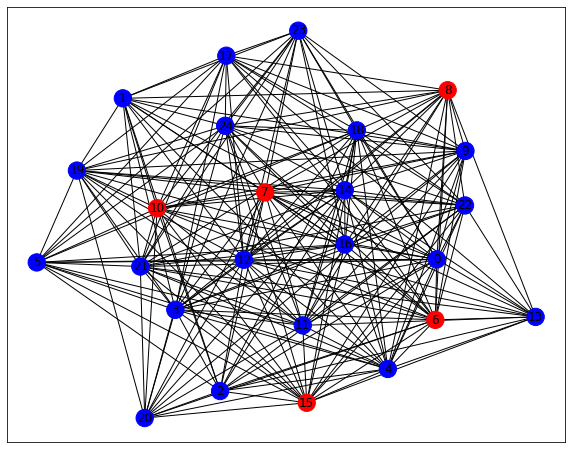

In [91]:
pos = nx.spring_layout(ke, k=0.3)
nx.draw_networkx(ke, pos, node_color=node_color(ke))

In [92]:
degree_list(ke)

array([20, 15, 15, 19, 19, 15, 19, 19, 17, 17, 17, 19, 20, 14, 21, 18, 19,
       16, 18, 17, 14, 19, 18, 15, 18])

In [93]:
np.mean(degree_list(ke))

17.52

In [94]:
t1 = time.time()
%timeit ke =  KE_network(N=100, m=5, mu=0.5)
t2 = time.time()
print(f' Dt = {t2 -t1}' )

362 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 Dt = 2.970370054244995


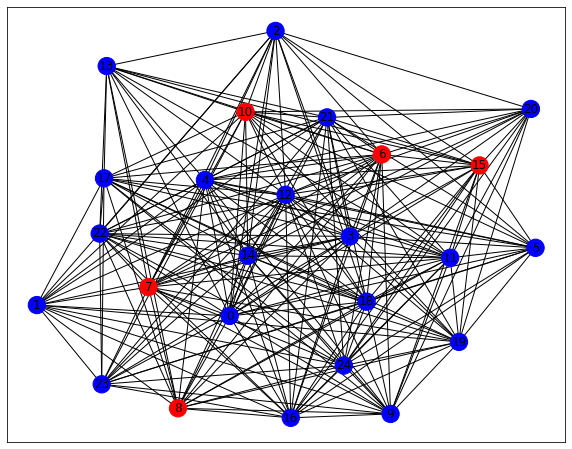

In [95]:
pos = nx.spring_layout(ke, k=0.3)
nx.draw_networkx(ke, pos, node_color=node_color(ke))

In [96]:
degree_list(ke)

array([20, 15, 15, 19, 19, 15, 19, 19, 17, 17, 17, 19, 20, 14, 21, 18, 19,
       16, 18, 17, 14, 19, 18, 15, 18])

In [97]:
np.mean(degree_list(ke))

17.52

In [100]:
t1 = time.time()
ke =  KE_network(N=200, m=5, mu=0.5)
t2 = time.time()
print(f' Dt = {t2 -t1}' )

 Dt = 3.0274832248687744


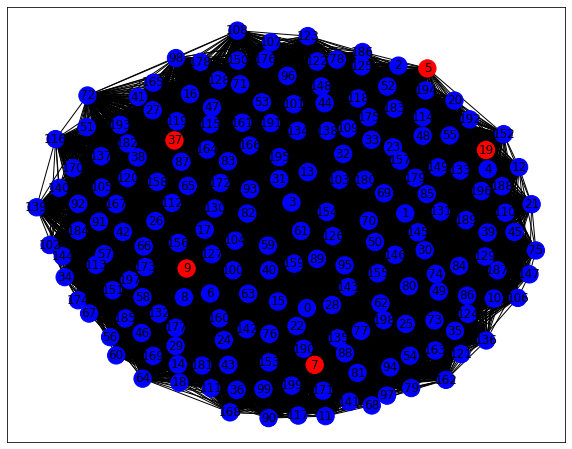

In [101]:
pos = nx.spring_layout(ke, k=0.3)
nx.draw_networkx(ke, pos, node_color=node_color(ke))

In [102]:
degree_list(ke)

array([141, 145, 139, 157, 132, 127, 141, 150, 144, 146, 136, 128, 139,
       144, 137, 149, 137, 143, 140, 140, 145, 132, 141, 146, 143, 141,
       137, 140, 136, 131, 152, 144, 143, 140, 143, 145, 134, 141, 127,
       130, 150, 136, 149, 135, 145, 138, 143, 147, 141, 146, 155, 132,
       142, 137, 140, 140, 140, 133, 143, 146, 136, 151, 141, 156, 140,
       139, 139, 137, 139, 137, 137, 147, 128, 139, 134, 129, 153, 143,
       147, 131, 135, 137, 140, 142, 140, 139, 143, 138, 146, 144, 137,
       139, 139, 129, 136, 143, 140, 133, 132, 136, 150, 142, 136, 144,
       133, 139, 131, 134, 129, 141, 138, 141, 141, 143, 140, 142, 129,
       135, 143, 141, 136, 139, 143, 126, 139, 130, 143, 140, 140, 136,
       148, 142, 140, 138, 138, 148, 131, 143, 139, 134, 143, 137, 145,
       150, 131, 143, 148, 136, 142, 142, 135, 133, 137, 138, 146, 142,
       147, 146, 140, 144, 139, 149, 133, 141, 149, 135, 137, 142, 132,
       137, 137, 134, 142, 134, 136, 144, 128, 135, 138, 141, 14

In [103]:
np.mean(degree_list(ke))

139.92

In [104]:
t1 = time.time()
ke =  KE_network(N=200, m=5, mu=1.0)
t2 = time.time()
print(f' Dt = {t2 -t1}' )

 Dt = 4.941334962844849


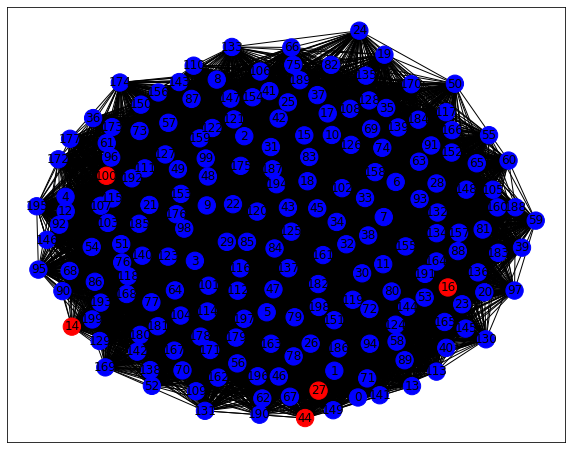

In [109]:
pos = nx.spring_layout(ke, k=0.3)
nx.draw_networkx(ke, pos, node_color=node_color(ke))

In [110]:
degree_list(ke)

array([104, 106, 119, 133, 109, 107, 109, 128, 109, 112, 124, 109, 105,
       101, 103, 121, 105, 118, 119,  97, 121, 114, 122, 106,  88, 117,
       108,  97, 125, 122, 115, 119, 125, 121, 118, 117, 109, 114, 123,
       112, 106, 119, 104, 125, 103, 119, 103, 107, 109, 122,  96, 116,
       103, 115, 121, 103, 114,  96, 115, 104, 103, 118, 102, 113, 111,
       108, 108, 112, 110, 117, 112, 111, 124, 113, 101, 113, 110, 110,
       109, 119, 109, 116, 112, 119, 118, 104, 107, 108,  98, 111, 102,
       113, 106, 110, 111,  99, 112, 104, 112, 120, 122, 117, 121, 108,
       114, 112, 107, 120, 121, 111, 112, 116, 112, 102, 110, 112, 114,
       116, 113, 107, 113, 122, 123, 115, 104, 110, 107, 117, 119, 112,
       106, 106, 112, 104, 114, 107, 109, 112, 106, 109, 111, 109, 112,
       117, 115, 107, 106, 118, 109, 107, 103, 120, 115, 113, 112, 108,
       118, 112, 115, 106, 108, 118, 104, 114, 112, 107, 113, 109, 110,
       105, 106, 113, 111, 111, 108, 119, 111, 104, 110, 116, 11

In [111]:
np.mean(degree_list(ke))

111.59

In [112]:
ke =KE_network(N=200, m=5, mu=0)

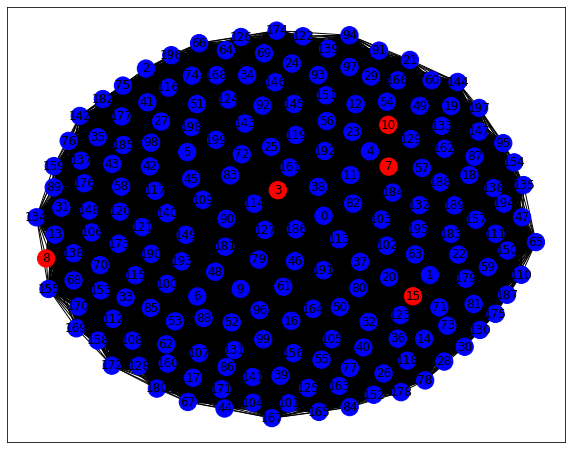

In [113]:
pos = nx.spring_layout(ke, k=0.3)
nx.draw_networkx(ke, pos, node_color=node_color(ke))

In [114]:
degree_list(ke)

array([199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 19

In [133]:
t1 = time.time()
ke_mu_1 =KE_network(N=100, m=10, mu=1.0)
t2 = time.time()
print(f'Time for 100 nodes = {t2 -t1}')

Time for 100 nodes = 10.895312070846558


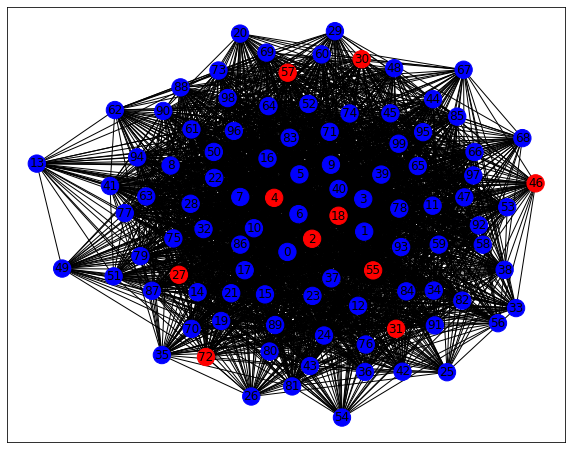

In [134]:
pos = nx.spring_layout(ke_mu_1, k=0.3)
nx.draw_networkx(ke_mu_1, pos, node_color=node_color(ke_mu_1))

In [136]:
degree_list(ke_mu_1)

array([83, 73, 87, 69, 79, 67, 82, 67, 54, 70, 63, 59, 58, 36, 60, 57, 67,
       53, 64, 56, 41, 59, 46, 59, 53, 40, 42, 50, 59, 43, 46, 47, 55, 41,
       50, 44, 45, 57, 52, 65, 58, 51, 40, 45, 47, 51, 45, 49, 44, 36, 58,
       43, 52, 48, 39, 53, 39, 42, 41, 48, 44, 47, 43, 52, 50, 53, 55, 40,
       39, 50, 51, 50, 48, 53, 48, 54, 50, 45, 57, 52, 52, 47, 50, 60, 48,
       49, 56, 48, 49, 52, 47, 53, 49, 53, 46, 50, 53, 46, 50, 50])

In [137]:
t1 = time.time()
ke_mu_0_1 =KE_network(N=200, m=10, mu=0.)
t2 = time.time()
print(f'Time for 100 nodes = {t2 -t1}')

Time for 100 nodes = 0.17298507690429688


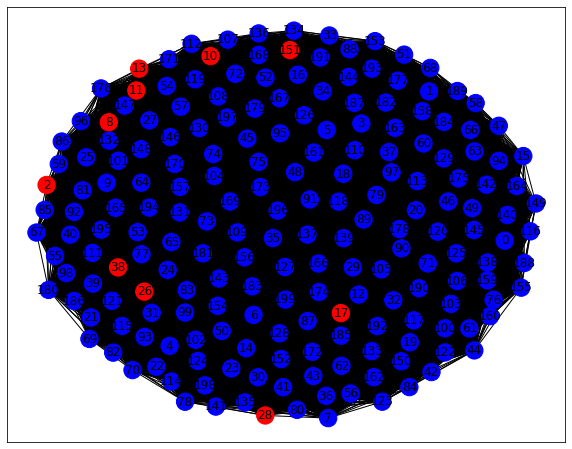

In [138]:
pos = nx.spring_layout(ke_mu_0_1, k=0.3)
nx.draw_networkx(ke_mu_0_1, pos, node_color=node_color(ke_mu_0_1))

In [140]:
t1 = time.time()
ke_mu_1_200 =KE_network(N=200, m=10, mu=1.0)
t2 = time.time()
print(f'Time for 200 nodes = {t2 -t1}')

Time for 200 nodes = 198.531170129776


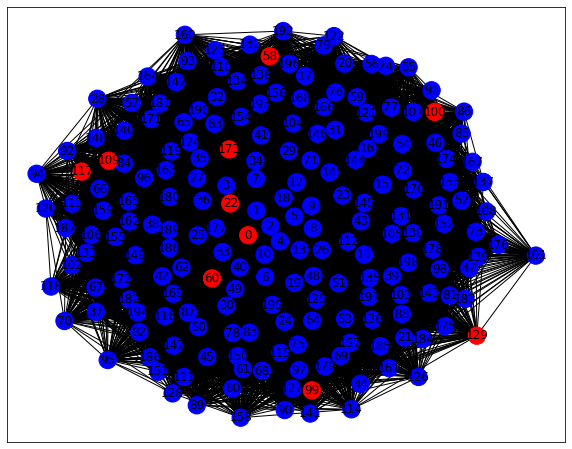

In [143]:
pos = nx.spring_layout(ke_mu_1_200, k=0.3)
nx.draw_networkx(ke_mu_1_200, pos, node_color=node_color(ke_mu_1_200))

In [144]:
degree_list(ke_mu_1_200)

array([167, 164, 162, 130, 165, 153, 139, 126, 156, 147, 154, 119, 119,
       146, 115, 113, 111, 105, 152, 110,  93,  94, 112, 112, 109, 114,
       132, 109,  90, 101, 109, 106, 103, 118, 124, 111, 126,  97,  93,
        94, 106, 102, 107, 109,  92,  92,  94,  78, 116, 105, 102, 116,
        94, 102, 103,  88,  83,  94,  93,  97, 101, 103, 107,  97, 111,
       100,  91,  81,  94,  88,  72, 118, 107,  79,  86,  94,  95,  94,
        95,  89,  93,  86,  93,  98,  87,  87,  85, 109,  95,  82,  87,
        83,  82,  84,  82,  84,  94,  97,  94,  94,  85,  70,  88, 104,
        89, 102,  95,  89,  95,  97,  94,  91, 108,  85,  77, 101,  99,
        97,  77, 106,  83,  98,  90,  93,  98,  99,  82,  89,  82,  86,
       105,  99,  91,  97,  98,  96,  92,  88,  99,  92,  91,  83,  93,
        87, 104,  99, 102,  98,  96,  99,  94,  93, 100,  97, 102,  98,
        94, 105,  90,  97,  92,  93,  99,  99,  89, 102,  97,  95, 100,
        99, 101, 100, 100,  99, 102,  90,  94,  96, 102, 100, 10

In [440]:
degree_list(ke)

array([85, 81, 84, 71, 75, 74, 78, 76, 71, 79, 76, 76, 63, 82, 70, 75, 67,
       69, 66, 75, 73, 76, 76, 67, 70, 69, 66, 71, 68, 73, 75, 71, 73, 81,
       75, 76, 72, 76, 75, 72, 68, 76, 78, 75, 80, 68, 73, 72, 76, 68, 76,
       76, 78, 73, 70, 74, 77, 75, 79, 76, 79, 79, 80, 75, 74, 74, 79, 74,
       77, 79, 76, 79, 79, 81, 78, 79, 81, 80, 77, 78, 81, 83, 81, 80, 79,
       80, 81, 79, 80, 76, 79, 75, 74, 78, 72, 77, 73, 70, 76, 70])

### First step

length of G->10
 deactivation prob normalisation = 1.1111111111111114
 deactivation prob  = [0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682]
Probability of being activated by preferencial attachment existing nodes = [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
after adding new node, list ->[(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 1}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1}), (10, {'state': 1})]
 list of links between new node and existing nodes  = [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9)]
Now establishing links
 Now considering link =(10, 0) from node = 10 to node = 0
 Attach active node =0
 Now linking with  =(10, 0)
 No

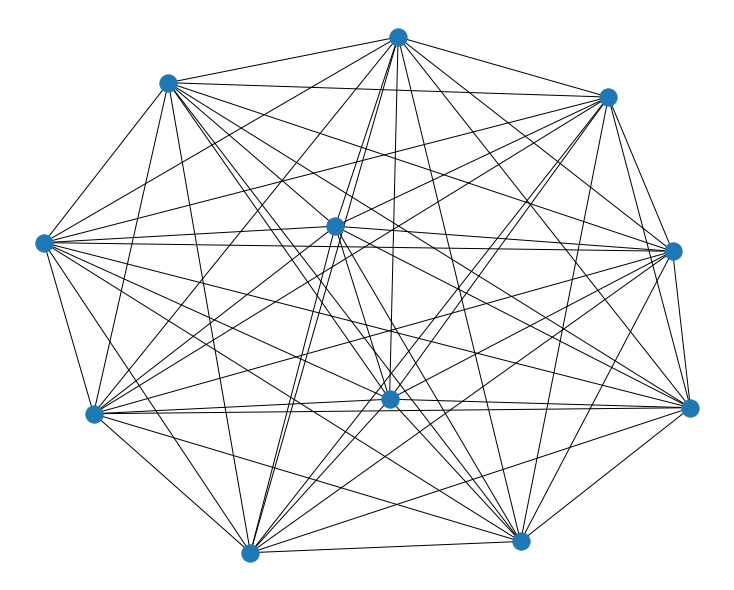

In [316]:
G1 = KE_newtwork_step(G)
print(f' new set of nodes after return = {G.nodes.data()}')
nx.draw(G1)

In [317]:
active_nodes(G1)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10]

### Second step

length of G->11
 deactivation prob normalisation = 1.0999999999999999
 deactivation prob  = [0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999]
Probability of being activated by preferencial attachment existing nodes = [(0, 0.09090909090909091), (1, 0.09090909090909091), (2, 0.09090909090909091), (3, 0.09090909090909091), (4, 0.09090909090909091), (5, 0.09090909090909091), (6, 0.09090909090909091), (7, 0.09090909090909091), (8, 0.09090909090909091), (9, 0.09090909090909091), (10, 0.09090909090909091)]
after adding new node, list ->[(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 1}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 0}), (8, {'state': 1}), (9, {'state': 1}), (10, {'state': 1}), (11, {'state': 1})]
 list of links between new node and existing nodes  = [(11, 0), (11, 1

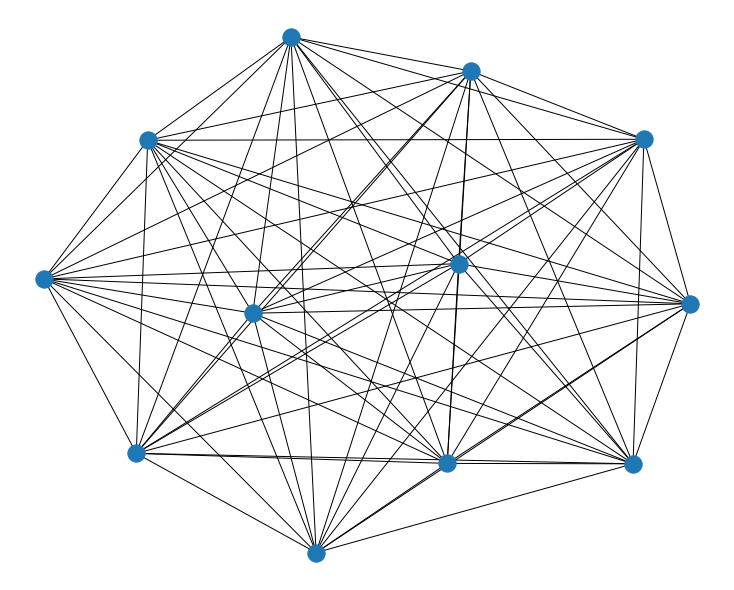

In [318]:
G2 = KE_newtwork_step(G1)
print(f' new set of nodes after return = {G1.nodes.data()}')
nx.draw(G2)

In [320]:
active_nodes(G2)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11]

length of G->12
 deactivation prob normalisation = 1.090909090909091
 deactivation prob  = [0.09917355371900828, 0.09917355371900828, 0.09917355371900828, 0, 0.09917355371900828, 0.09917355371900828, 0.09917355371900828, 0.09917355371900828, 0.09917355371900828, 0.09917355371900828, 0, 0.09917355371900828]
Probability of being activated by preferencial attachment existing nodes = [(0, 0.08333333333333333), (1, 0.08333333333333333), (2, 0.08333333333333333), (3, 0.08333333333333333), (4, 0.08333333333333333), (5, 0.08333333333333333), (6, 0.08333333333333333), (7, 0.08333333333333333), (8, 0.08333333333333333), (9, 0.08333333333333333), (10, 0.08333333333333333), (11, 0.08333333333333333)]
after adding new node, list ->[(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 0}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1}), (10, {'state': 0}), (11, {'state': 1}), (12, {'state': 1})]
 list of links betwee

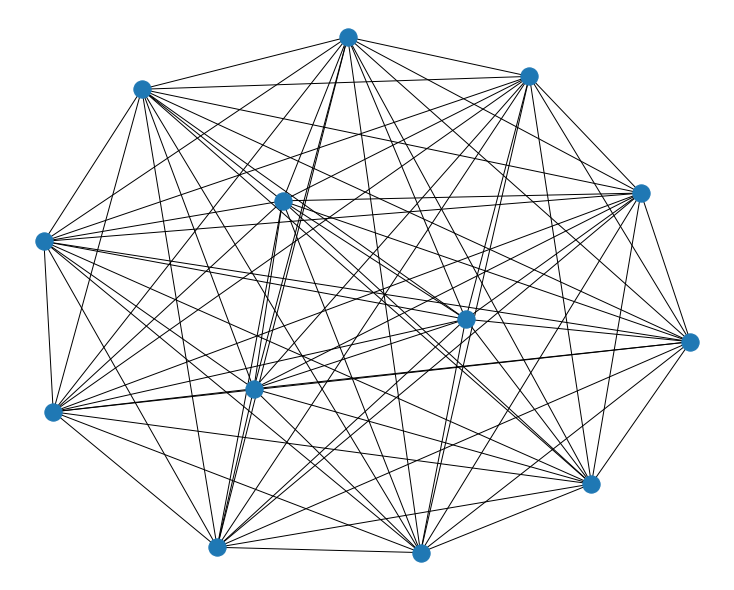

In [307]:
G3 = KE_newtwork_step(G2)
print(f' new set of nodes after return = {G2.nodes.data()}')
nx.draw(G3)

In [310]:
degree_list(G3)

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [298]:
m = 10
mu = 0.5
G = nx.complete_graph(m)

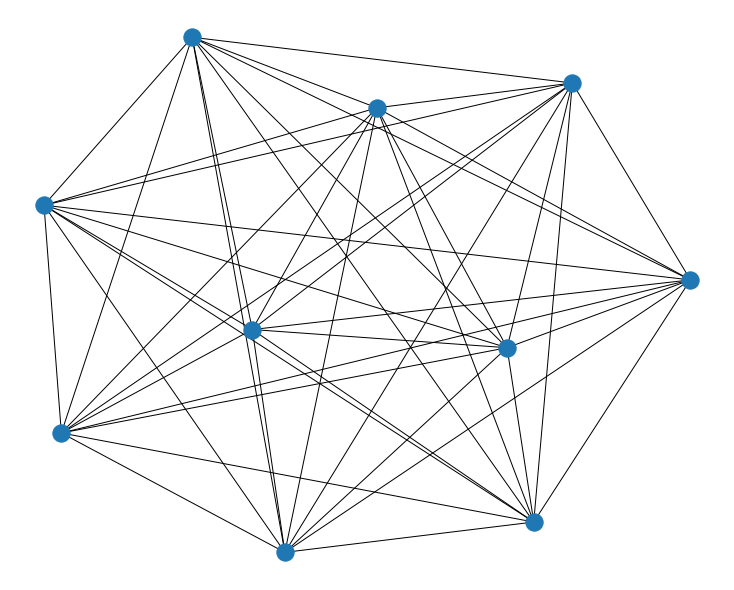

In [299]:
nx.draw(G)

In [206]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [207]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)])

In [208]:
G.degree

DegreeView({0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9})

In [209]:
len(G)

10

In [210]:
degree_list(G)

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [211]:
tot_k(G)

90

In [212]:
a = ke_norm(G)
a

1.1111111111111114

In [213]:
Pj = [ke_pkj(G, a, j) for j in degree_list(G)]
Pj

[0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682,
 0.12345679012345682]

### Set all nodes as active

In [214]:
for n in range(len (G)):
     G.nodes[n]['state'] = 1

In [215]:
G.nodes.data()

NodeDataView({0: {'state': 1}, 1: {'state': 1}, 2: {'state': 1}, 3: {'state': 1}, 4: {'state': 1}, 5: {'state': 1}, 6: {'state': 1}, 7: {'state': 1}, 8: {'state': 1}, 9: {'state': 1}})

### Add a new node i to the network. The new node is disconnected at first, so ki = 0 at this point.

In [216]:
new_node = m
G.add_node(new_node)
G.nodes[new_node]['state'] = 1
G.nodes.data()

NodeDataView({0: {'state': 1}, 1: {'state': 1}, 2: {'state': 1}, 3: {'state': 1}, 4: {'state': 1}, 5: {'state': 1}, 6: {'state': 1}, 7: {'state': 1}, 8: {'state': 1}, 9: {'state': 1}, 10: {'state': 1}})

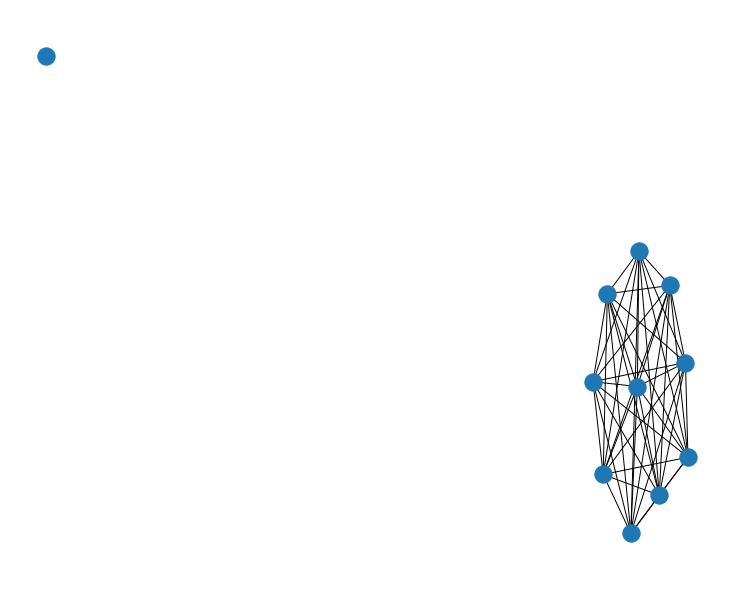

In [217]:
nx.draw(G)

### For each of the m links of the new node it is decided randomly whether the link connects to the active node (as in the original model) or it connects to a random node. The latter case occurs with a probability μ.

In [218]:
nl = list(zip(new_node *[new_node], list(G.nodes)))
nl

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9)]

In [219]:
P = [degree(G, nlink[1]) / tot_k(G) for nlink in nl]
PP = list(zip(list(G.nodes), P))
print(f'PP = {PP}')

for link in nl:
    print(f' Now considering link ={link}')
    if throw_dice(mu): # attach to a random node
        print(f' Random node')
        #print(f' Now choosing a random node from prob list ={P}')
        ip = np.argmax(P)
        node = PP[ip][0]
        #print(f' position of the max = {ip}, node ={node}')
        edge = (new_node, node)
        print(f' now creating a new edge = {edge}')
        G.add_edge(*edge)
        if len(P) > 0:
            P.pop(ip)
            PP.pop(ip)
            #print(f'PP = {PP}')
    else:
        print(f' Not Random node')
        print(f' Now linking with  ={link}')
        if len(P) > 0:
            P.pop(ip)
            PP.pop(ip)

        G.add_edge(*edge)
        

PP = [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
 Now considering link =(10, 0)
 Not Random node
 Now linking with  =(10, 0)
 Now considering link =(10, 1)
 Not Random node
 Now linking with  =(10, 1)
 Now considering link =(10, 2)
 Random node
 now creating a new edge = (10, 2)
 Now considering link =(10, 3)
 Not Random node
 Now linking with  =(10, 3)
 Now considering link =(10, 4)
 Random node
 now creating a new edge = (10, 4)
 Now considering link =(10, 5)
 Not Random node
 Now linking with  =(10, 5)
 Now considering link =(10, 6)
 Not Random node
 Now linking with  =(10, 6)
 Now considering link =(10, 7)
 Not Random node
 Now linking with  =(10, 7)
 Now considering link =(10, 8)
 Random node
 now creating a new edge = (10, 8)
 Now considering link =(10, 9)
 Not Random node
 Now linking with  =(10, 9)


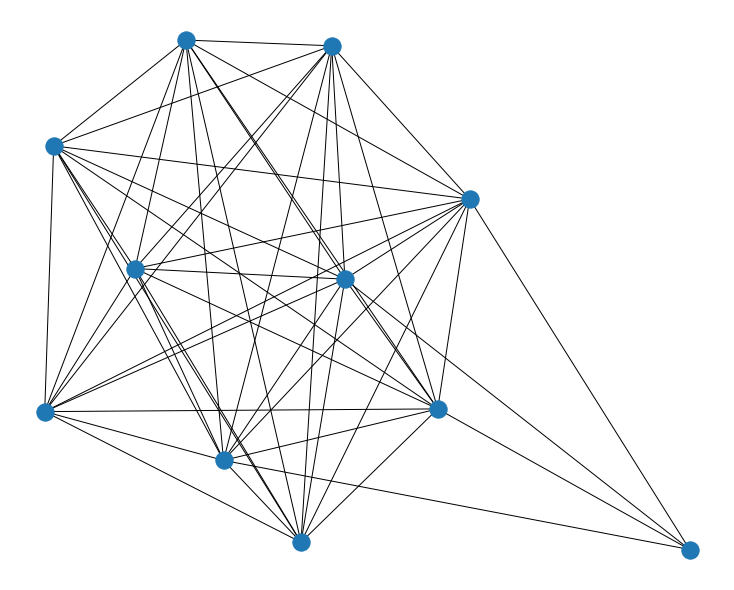

In [220]:
nx.draw(G)

In [221]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [222]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10)])

## Deactivate a node

In [239]:
len(G)

11

In [224]:
G.nodes.data()

NodeDataView({0: {'state': 1}, 1: {'state': 1}, 2: {'state': 1}, 3: {'state': 1}, 4: {'state': 1}, 5: {'state': 1}, 6: {'state': 1}, 7: {'state': 1}, 8: {'state': 1}, 9: {'state': 1}, 10: {'state': 0}})

In [288]:
def KE_network_init(m=10, mu=0.5):
    G = nx.complete_graph(m)
    for n in range(m):
        G.nodes[n]['state'] = 1
    print(f'nodes->{G.nodes.data()}')
    print(f'links->{G.edges}')

    return G

In [289]:
def KE_newtwork_step(G):
    m = len(G)
    print(f'length of G->{m}')
    
    a = ke_norm(G)
    print(f' deactivation prob normalisation = {a}')
    Pj = [ke_pkj(G, a, j) for j in degree_list(G)]
    print(f' deactivation prob  = {Pj}')
    
    new_node = m
    G.add_node(new_node)
    G.nodes[new_node]['state'] = 1
    G.nodes.data()
    
    nl = list(zip(new_node *[new_node], list(G.nodes)))
    print(f' list of links between new node and existing nodes  = {nl}')
    
    P = [degree(G, nlink[1]) / tot_k(G) for nlink in nl]
    PP = list(zip(list(G.nodes), P))
    print(f'Probability of being activated by preferencial attachment exsiting nodes = {PP}')
    
    print(f'Now establishing links')
    
    ip = 0
    for link in nl:
        node = link[1]
        print(f' Now considering link ={link} to node = {node}')
        if throw_dice(mu): # attach to a random node
            print(f' Random node')
            #print(f' Now choosing a random node from prob list ={P}')
            ip = np.argmax(P)
            node = PP[ip][0]
            #print(f' position of the max = {ip}, node ={node}')
            edge = (new_node, node)
            print(f' now creating a new edge = {edge}')
            G.add_edge(*edge)
            if len(P) > 0:
                P.pop(ip)
                PP.pop(ip)
                #print(f'PP = {PP}')
        else:
            print(f' Not Random node')
            print(f' Now linking with  ={link}')
            if len(P) > 0:
                P.pop(ip)
                PP.pop(ip)

            G.add_edge(*link)

        
    print(f'now deactivating link')
    deac = False 
    for j in range(m):
        print(f' now considering link {j}')
        if throw_dice(Pj[j]):
            print(f'turn off node {j}')
            G.nodes[j]['state'] = 0
            deac = True
            break
    if deac == False:
        print(f'turn off node {j}')
        G.nodes[j]['state'] = 0

    print(f' new set of nodes = {G.nodes.data()}')
    return G

In [290]:
G = KE_network_init(m=10, mu=0.5)
print(f' new set of nodes after return = {G.nodes.data()}')

nodes->[(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 1}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1})]
links->[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
 new set of nodes after return = [(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 1}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1})]


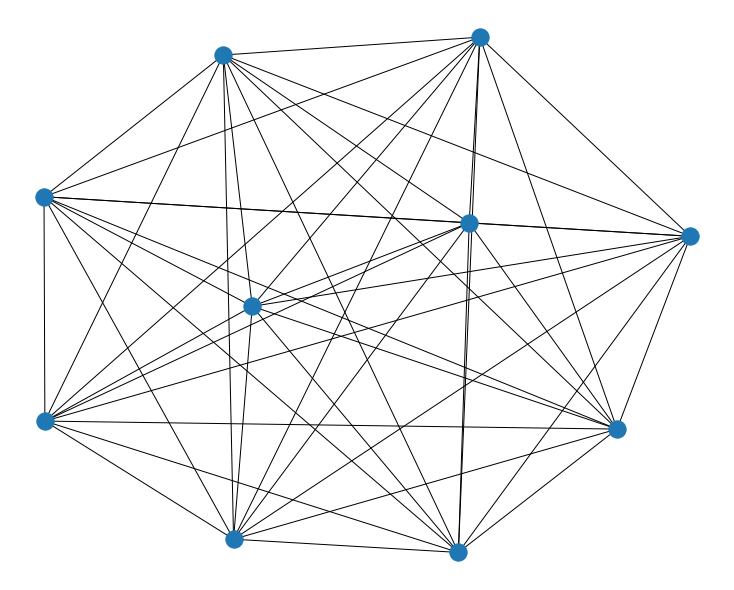

In [291]:
G = KE_network_init(m=10, mu=0.5)
print(f' new set of nodes after return = {G.nodes.data()}')
nx.draw(G)

In [292]:
G1 = KE_newtwork_step(G)

length of G->10
 deactivation prob normalisation = 1.1111111111111114
 deactivation prob  = [0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682, 0.12345679012345682]
 list of links between new node and existing nodes  = [(10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9)]
Probability of being activated by preferencial attachment exsiting nodes = [(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
Now establishing links
 Now considering link =(10, 0) to node = 0
 Not Random node
 Now linking with  =(10, 0)
 Now considering link =(10, 1) to node = 1
 Not Random node
 Now linking with  =(10, 1)
 Now considering link =(10, 2) to node = 2
 Random node
 now creating a new edge = (10, 2)
 Now considering link =(10, 3) to node = 3
 Not Random node
 Now linking with  =(10, 3

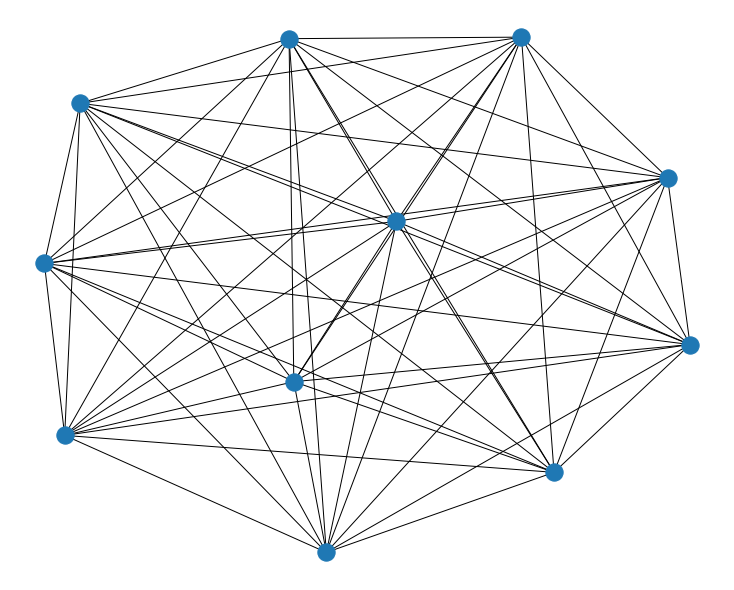

In [293]:
G1 = KE_newtwork_step(G)
nx.draw(G1)

In [294]:
print(f' new set of nodes after return = {G1.nodes.data()}')

 new set of nodes after return = [(0, {'state': 1}), (1, {'state': 1}), (2, {'state': 1}), (3, {'state': 0}), (4, {'state': 1}), (5, {'state': 1}), (6, {'state': 1}), (7, {'state': 1}), (8, {'state': 1}), (9, {'state': 1}), (10, {'state': 1})]


In [295]:
G2 = KE_newtwork_step(G1)

length of G->11
 deactivation prob normalisation = 1.0999999999999999
 deactivation prob  = [0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999]
 list of links between new node and existing nodes  = [(11, 0), (11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10)]
Probability of being activated by preferencial attachment exsiting nodes = [(0, 0.09090909090909091), (1, 0.09090909090909091), (2, 0.09090909090909091), (3, 0.09090909090909091), (4, 0.09090909090909091), (5, 0.09090909090909091), (6, 0.09090909090909091), (7, 0.09090909090909091), (8, 0.09090909090909091), (9, 0.09090909090909091), (10, 0.09090909090909091)]
Now establishing links
 Now considering link =(11, 0) to node = 0
 Not Random node
 Now linking with  =(11, 0)
 Now considering link =(11, 1) to node = 1
 Ran

In [ ]:
mu = 0.1
prob = [throw_dice(mu) for n in range(m)]

#### Attach m outgoing links to the new node i. Each node j of the m active nodes receives exactly one incoming link, thereby kj → kj + 1.

In [42]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [49]:
nl = list(zip(10 *[10], list(G.nodes)))
nl

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9)]

In [50]:
 G.add_edges_from(nl)

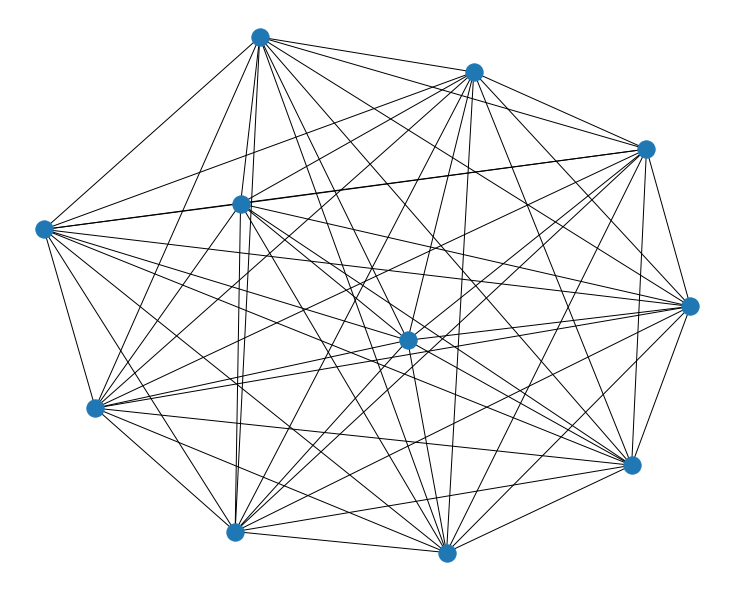

In [51]:
nx.draw(G)

In [52]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

In [53]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10), (9, 10)])

#### Deactivate one of the active nodes. The probability that the node j is deactivated is given by

$$ P(k_j) = \frac{\gamma - 1}{a + k_j}, a > 0 $$

$$ \gamma -1 = \large\left(\sum_{l \epsilon A} \frac{1}{a + k_l}\large\right)^{-1}$$

A is the set of currently active nodes

In [54]:
def degree_list(g):
    D = np.array([degree(g,n) for n in nodes(g)])
    return D

In [55]:
degree_list(G)

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [78]:
a = gnorm(G)
a

1.0999999999999999

In [79]:
def probk(G, a,  j):
    K = degree_list(G)
    return a / K[j]

In [81]:
a = 1
P =[probk(G, a, j) for j in G.nodes]
P

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [84]:
def throw_dice(dice):
    atry =  np.random.random_sample()
    if atry < dice:
        return 1
    else:
        return 0

In [93]:
mask = [throw_dice(p) for p in P]
mask

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [94]:
kl = np.nonzero(mask)[0][0]
kl

10

In [95]:
G.remove_node(kl)

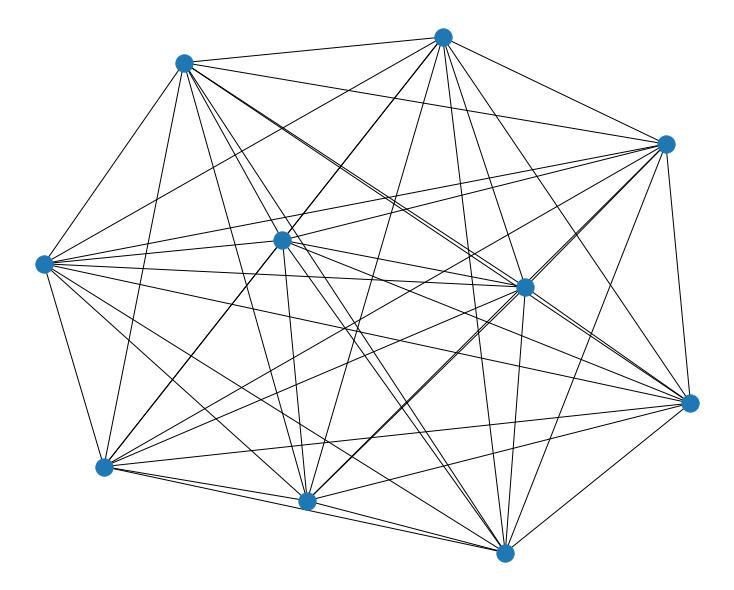

In [96]:
nx.draw(G)